In [62]:
#Data Visuals
#4/3/25
#Skyline F1

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(pd)

<module 'pandas' from '/Users/kat/.pyenv/versions/3.13.2/lib/python3.13/site-packages/pandas/__init__.py'>


In [104]:
# Combined data from 3 Transit agencies (MUNI, BART, and Golden Gate Transit)
data2 = pd.read_csv('theCombinedData.csv') 
data2.columns = data2.columns.str.strip()
total_ridership_median = data2["Total Ridership(Median)"].str.replace(",", "").astype(int)
data2["Total Ridership(Median)"] = total_ridership_median

data2

,Month,Year,AQI(Median),Total Ridership(Median)
0,January,2019,41,8918159
1,February,2019,36,8438131
2,March,2019,39,9240618
3,April,2019,44,9522988
4,May,2019,41,9501965
5,June,2019,44,9283382
6,July,2019,43,9382058
7,August,2019,37,9601278
8,September,2019,30,9184386
9,October,2019,52,9857334


In [105]:
for columnName in data2.columns:
    print(columnName)

Month
Year
AQI(Median)
Total Ridership(Median)


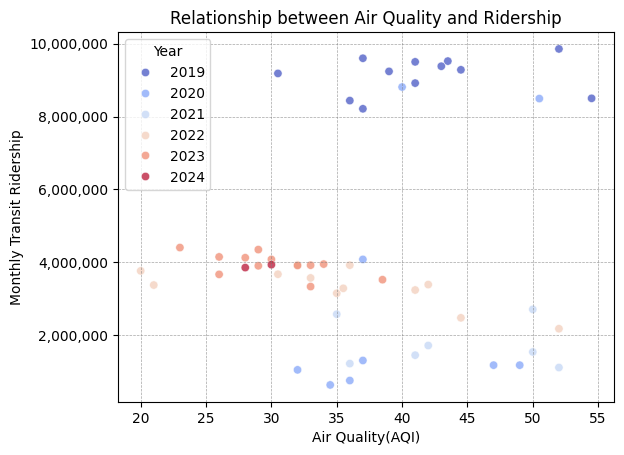

In [110]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.scatterplot(x=data2["AQI(Median)"], y=data2["Total Ridership(Median)"], hue=data2["Year"], palette="coolwarm", alpha=0.7)

# Get the current axis
ax = plt.gca()

# Fix to get rid of the scientific notation
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(comma_format))
ax.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)

plt.title('Relationship between Air Quality and Ridership')
plt.xlabel("Air Quality(AQI)")
plt.ylabel("Monthly Transit Ridership")

plt.show()

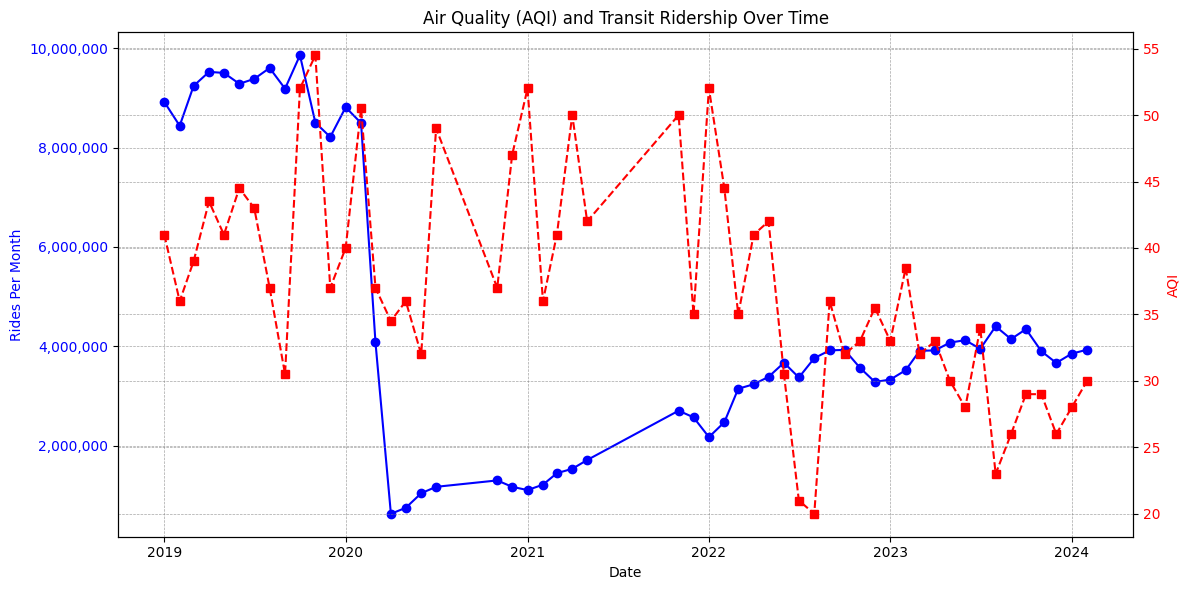

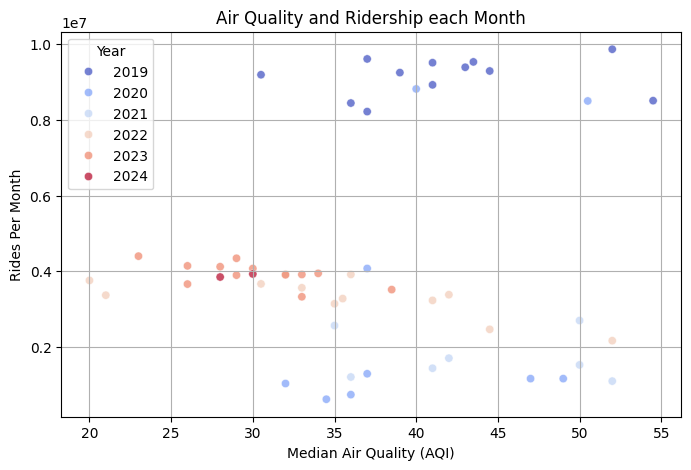

In [103]:
# Y Axis fixes
import matplotlib.ticker as mticker
def comma_format(x, pos):
    return f"{x:,.0f}"

mrpm_y_label = "Rides Per Month"
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
data2["month"] = data2["Month"].map(month_mapping)

data2["AQI(Median)"] = pd.to_numeric(data2["AQI(Median)"], errors='coerce')

data2["date"] = pd.to_datetime(data2["Year"].astype(str) + "-" + data2["month"].astype(str), format="%Y-%m")

data2 = data2.sort_values("date")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel(mrpm_y_label, color="b")
ax1.plot(data2["date"], total_ridership_median, marker="o", color="b", label="Total Ridership")
ax1.tick_params(axis="y", labelcolor="b")
# Fix to get rid of the scientific notation
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax1.ticklabel_format(style='plain', axis='y')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(comma_format))
ax1.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)

ax2 = ax1.twinx()
ax2.set_ylabel("AQI", color="r")
ax2.plot(data2["date"], data2["AQI(Median)"], marker="s", linestyle="dashed", color="r", label="AQI")
ax2.tick_params(axis="y", labelcolor="r")
# Fix to get rid of the scientific notation
ax2.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax2.ticklabel_format(style='plain', axis='y')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(comma_format))
ax2.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)

plt.title("Air Quality (AQI) and Transit Ridership Over Time")
fig.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data2["AQI(Median)"], y=total_ridership_median, hue=data2["Year"], palette="coolwarm", alpha=0.7)

sns.regplot(x=data2["AQI(Median)"], y=total_ridership_median, scatter=False, color="black", fit_reg=False)

plt.xlabel("Median Air Quality (AQI)")
plt.ylabel(mrpm_y_label)
plt.title("Air Quality and Ridership each Month")
plt.grid(True)
plt.show()

In [98]:
# R-squared for the whole time

coeffiecients = np.polyfit(data2["Total Ridership(Median)"], data2["AQI(Median)"], 1)
y_pred = np.polyval(coeffiecients, data2["Total Ridership(Median)"])

# R-squared
ss_t = np.sum((data2["AQI(Median)"]-np.mean(data2["AQI(Median)"]))**2)
ss_residual = np.sum((data2["AQI(Median)"]-y_pred)**2)
r2 = 1 - (ss_residual/ ss_t)

print(r2)

0.021185732113517597


In [99]:
np.round(np.sqrt(r2), 4)

np.float64(0.1456)

In [128]:
# Let's break our time series into 3 periods:
# 1) pre-covid
# 2) covid
# 3) post-covid
# and let's see if there is a clear relationship between air quality and ridership in each period
# then let's compare these periods to notice any patterns

In [130]:
def calculateRSquared(ridershipData):
    """ Calculates R-Squared for a specific period. Requires ridershipData object with the data for that period """
    coefficients = np.polyfit(ridershipData["Total Ridership(Median)"], ridershipData["AQI(Median)"], 1)
    y_pred = np.polyval(coefficients, ridershipData["Total Ridership(Median)"])

    # R-squared
    ss_t = np.sum((ridershipData["AQI(Median)"]-np.mean(ridershipData["AQI(Median)"]))**2)
    ss_residual = np.sum((ridershipData["AQI(Median)"]-y_pred)**2)
    r2 = 1 - (ss_residual/ ss_t)
    
    return r2

In [140]:
print("Pre-covid R-Squared is: " + str(calculateRSquared(data2.iloc[0:14])))
print("Covid R-Squared is: " + str(calculateRSquared(data2.iloc[15:33])))
print("Post-covid R-Squared is: " + str(calculateRSquared(data2.iloc[36:54])))


print("\nWhat conclusions can we make based on these numbers??")

Pre-covid R-Squared is: 0.0007703535738418088
Covid R-Squared is: 0.007542265476498278
Post-covid R-Squared is: 0.38775355271154865

What conclusions can we make based on these numbers??
